100%|██████████| 400/400 [04:00<00:00,  1.66it/s]


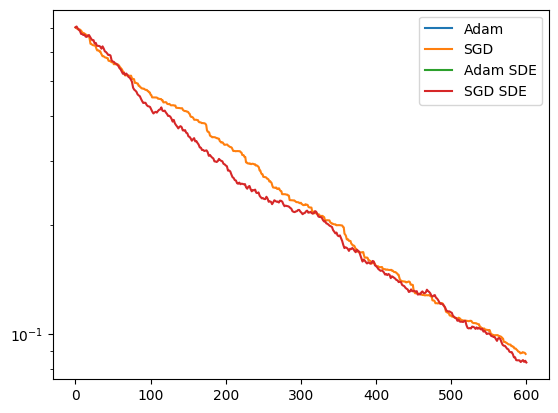

In [1]:
from optimizers import Adam, SGD
from sdes import AdamSDE, SgdSDE
from odes import AdamODE, SgdODE

import jax
import jax.numpy as jnp
from jax.numpy.linalg import norm

import matplotlib.pyplot as plt

# Setup the problem and parameters

problem_type = 'linreg' # from  'logreg' or 'linreg' or 'lip_phaseret' or 'real_phaseret'

d = 300 # dimension
beta1 = 0 
beta2 = 0.7
T = 2 # time to run SDE for

lr = 1.2 # SDE learning rate
lrk = lr / d # Optimzer learning rate

# lr = lambda x: jnp.cos(2 * x / T) # SDE learning rate
# lrk = lambda x: jnp.cos(2 * x / T / d) / d # Optimizer learning rate

cov = jnp.linspace(0.0, 1.5, d) # initialize with diagonal covariance

key = jax.random.PRNGKey(0)
key_init, key_opt, key = jax.random.split(key, 3)
params0 = jax.random.normal(key_init, d)
optimal_params = jax.random.normal(key_opt, d)

# params0 = jnp.linspace(2,0.1,d)
# optimal_params = jnp.linspace(0.1,2,d)


params0 /= norm(params0)
optimal_params /= norm(optimal_params)


# Run the optimizers
adam = Adam(problem_type)
sgd = SGD(problem_type)

_, adam_risks = adam.run(params0, cov, T, lrk, optimal_params, beta1 = beta1, beta2 = beta2)
_, sgd_risks = sgd.run(params0, cov, T, lrk, optimal_params)

# Run the SDE equivalents
sgd_sde = SgdSDE(problem_type)
adam_sde = AdamSDE(problem_type)

params, sgd_sde_risks, times_s = sgd_sde.run(params0, optimal_params, cov, T, lr)
params, adam_sde_risks, times_s = adam_sde.run(params0, optimal_params, cov, T, lr, beta1 = beta1, beta2 = beta2)

# Run the ODE equivalents
# adam_ode = AdamODE(problem_type)
# sgd_ode = SgdODE(problem_type)

# sgd_risk, time, B = sgd_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01)
# adam_risk, time, B = adam_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01, beta1 = beta1, beta2 = beta2, eps = 0.001)

plt.yscale('log')
plt.plot(adam_risks, label = 'Adam')
plt.plot(sgd_risks, label = 'SGD')

plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')


# plt.plot(time * d, adam_risk, label = 'Adam ODE')
# plt.plot(time * d, sgd_risk, label = 'SGD ODE')

plt.legend()
plt.show()

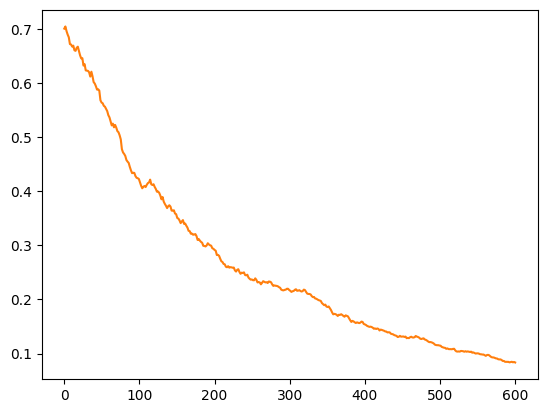

In [6]:
plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')
plt.show()

In [7]:
adam_sde_risks

Array([0.70084685,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

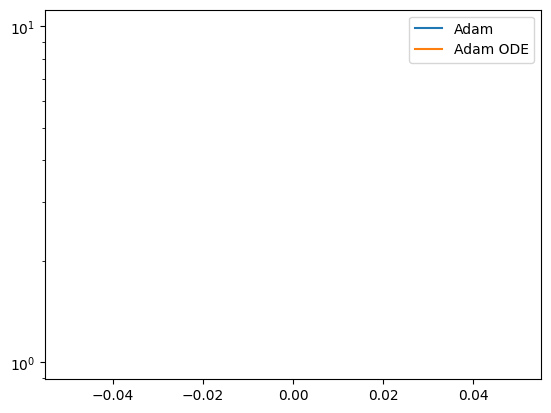

In [ ]:
plt.yscale('log')
plt.plot(adam_risks, label = 'Adam')
# plt.plot(sgd_risks, label = 'SGD')

# plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
# plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')

plt.plot(time * d, adam_risk, label = 'Adam ODE')
# plt.plot(time * d, sgd_risk, label = 'SGD ODE')

plt.legend()
plt.show()